### Pranay Kumar
# Practical 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import bisect, minimize

In [2]:
def mu_inverse(r, theta, b, gammaC, gammaS):
    c = np.cos(theta) #Using c and s in place of x and y in the functions below since cartestian to polar is just rcos(theta) for x and rsin(theta) for y.
    s = np.sin(theta)
    phixx = b * s ** 2 / r + gammaC #The lens potential equations being written in terms of c, s, and radius.
    phiyy = b * c ** 2 / r - gammaC
    phixy = -b * c * s / r + gammaS
    return (1.0 - phixx) * (1.0 - phiyy) - phixy ** 2 # Returning the lens magnification equation.

In [3]:
def find_rcrit(theta, b, gammac, gammas):
    return bisect(mu_inverse, 1.0e-4 * b, 3.0 * b, args=(theta, b, gammac, gammas)) #Finding the roots of the lens magnification equation.

In [4]:
def calc_criticaus(b, gammac, gammas, title):
    tarr = np.linspace(0.0, 2.0 * np.pi, 100) #Generating theta values from 0 to 2pi.
    rarr = np.zeros(len(tarr)) #Generating radius values with the same length as the theta array above.

    for i in range(len(tarr)):
        rarr[i] = find_rcrit(tarr[i], b, gammac, gammas) # Running the bisect function for the entire length of the theta array, taking in accompanying radius values and the given b and shear values.

    xarr = rarr * np.cos(tarr) #Converting radius and theta values back to x and y.
    yarr = rarr * np.sin(tarr)

    phix = b * xarr / rarr + gammac * xarr + gammas * yarr # First derivative of lens potential with respect to x.
    phiy = b * yarr / rarr + gammas * xarr - gammas * yarr # First derivative of lens potential with respect to y.
    uarr = xarr - phix # Source plane position of x.
    varr = yarr - phiy # Source plane position of y.

    plt.figure(figsize=(3, 3), dpi=150) #Outlining the size and resolution of the graph.
    plt.title(title)
    plt.plot(xarr,yarr,'r',label='Critical Curve') #Plotting the results to find the critical curve
    plt.plot(uarr,varr,'b',label='Caustics') #Plotting the results to find the critical curve
    plt.legend(loc='upper left') #Placing the legend in the top left
    plt.show()

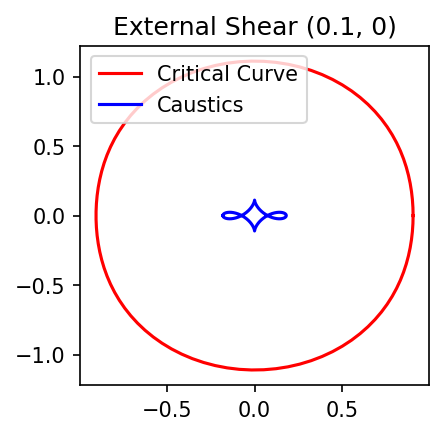

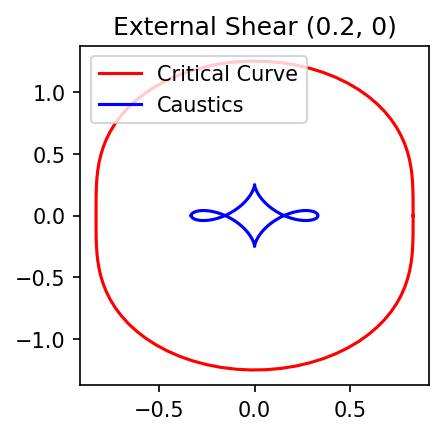

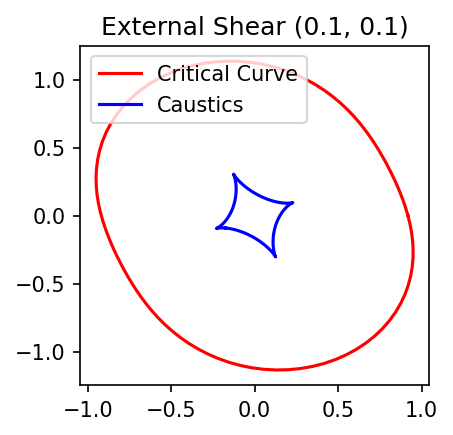

In [5]:
calc_criticaus(1, 0.1, 0, "External Shear (0.1, 0)") #Finding the critical curves and caustics for the following shear.
calc_criticaus(1, 0.2, 0, "External Shear (0.2, 0)")
calc_criticaus(1, 0.1, 0.1, "External Shear (0.1, 0.1)")